### Clustering med unsupervised learning

Udover vores arbejde med supervised learning-modeller har vi besluttet også at inddrage **unsupervised learning** i projektet. Det gør vi for at undersøge, om der findes skjulte mønstre eller grupperinger i data, som ikke nødvendigvis handler om en forudsigelse af selvmordsraten.

Vi vil derfor anvende **clustering**, fx med **K-Means**, til at identificere naturlige grupper i datasættet. Det kan f.eks. være lande eller observationer, der ligner hinanden på tværs af alder, køn og BNP – og som måske har ens selvmordsprofiler.

Formålet med denne del af projektet er ikke at forudsige, men at **udforske strukturer i data**, som vores tidligere modeller ikke nødvendigvis opfanger. Det giver os mulighed for at få en mere åben og data-drevet forståelse af, hvilke mønstre der findes i selvmordsdata på tværs af verden.



cluster
1    13418
0    11546
2      656
Name: count, dtype: int64

Cluster centers:
    suicides_no    population  suicides/100k pop  gdp_per_capita ($)  \
0   152.698909  1.352640e+06          12.223000        16753.960859   
1    73.614697  1.475660e+06           4.962983        16446.352586   
2  2775.484709  1.872556e+07          16.696101        34848.409786   

   gdp_for_year  age_encoded  sex_numeric  country_numeric  
0  2.619045e+11     2.258140     1.001905        49.168254  
1  2.815168e+11     2.472872     2.000000        49.570279  
2  7.193524e+12     2.776758     1.487768        74.015291  


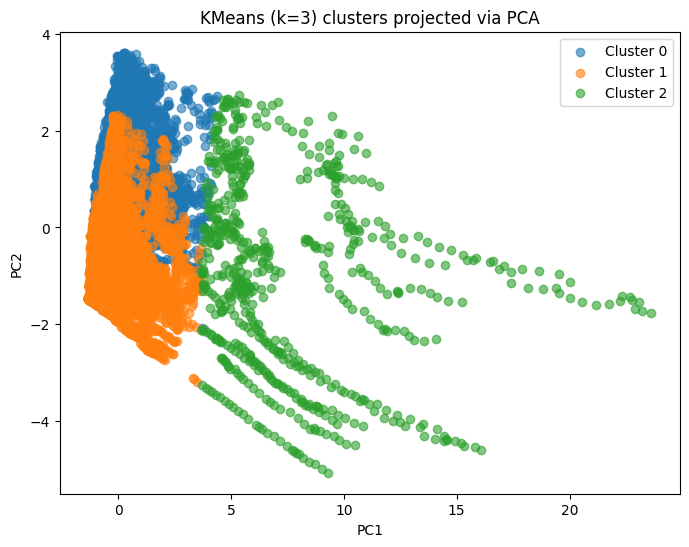

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("cleaned_suicide_data.csv")

# 0. Rebuild X as a DataFrame to retain column names
X = df.select_dtypes(include=[np.number]).drop(columns=['year'])
feature_names = X.columns.tolist()

# 1. (Optional but recommended) Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Fit KMeans with k=3
k = 3
km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
km.fit(X_scaled)

# 3. Grab the cluster labels and add them back to your original DataFrame
df['cluster'] = km.labels_

# 4. Inspect cluster sizes
print(df['cluster'].value_counts())

# 5. Look at the cluster centers (in the original feature space)
centers = scaler.inverse_transform(km.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=feature_names)
print("\nCluster centers:\n", centers_df)

# 6. (Optional) Visualize clusters in 2D with PCA
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(k):
    mask = (km.labels_ == cluster)
    plt.scatter(proj[mask, 0], proj[mask, 1], label=f"Cluster {cluster}", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans (k=3) clusters projected via PCA")
plt.legend()
plt.show()


## Cluster 0 – “Typisk mandligt mønster”
- **Størrelse:** 11 546 poster  
- **Køn:** `sex_numeric ≈ 1.00` ⇒ næsten udelukkende **mænd**  
- **Alder:** `age_encoded ≈ 2.26` ⇒ centreret mellem “25–34” og “35–54”  
- **Befolkning:** ~1,35 millioner  
- **Selvmord pr. 100 000:** ~12,2  
- **BNP per indbygger:** \$16 754  
- **Samlet BNP:** \$2,6 × 10¹¹  

**Konklusion:**  
Midaldrende mænd i mellemstore, middelindkomstlande begår selvmord med ca. **12 pr. 100 000**—mere end dobbelt så ofte som kvinder. Understreger det velkendte kønsgab i selvmordsrisiko blandt erhvervsaktive.

---

## Cluster 1 – “Typisk kvindeligt mønster”
- **Størrelse:** 13 418 poster  
- **Køn:** `sex_numeric = 2.00` ⇒ **kvinder**  
- **Alder:** `age_encoded ≈ 2.47` ⇒ omkring “25–54”  
- **Befolkning:** ~1,48 millioner  
- **Selvmord pr. 100 000:** ~5,0  
- **BNP per indbygger:** \$16 446  
- **Samlet BNP:** \$2,8 × 10¹¹  

**Konklusion:**  
Midaldrende kvinder i samme lande som Klynge 0 har en selvmordsrate under **5 pr. 100 000**—mindre end halvdelen af mændene. Køn er hovedskillelinjen her.

---

## Cluster 2 – “Store, højindkomst-afvigere”
- **Størrelse:** 656 poster  
- **Køn:** `sex_numeric ≈ 1.49` ⇒ blandet mænd/kvinder  
- **Alder:** `age_encoded ≈ 2.78` ⇒ lidt ældre (“35–54”)  
- **Befolkning:** ~18,7 millioner (12–14 gange større end Klynge 0/1)  
- **Selvmord pr. 100 000:** ~16,7  
- **BNP per indbygger:** \$34 848  
- **Samlet BNP:** \$7,2 × 10¹²  

**Konklusion:**  
Omfatter de største, rigeste lande (f.eks. USA, Tyskland, Japan). Trods høj velstand er selvmordsraten over **16 pr. 100 000**—den højeste. Befolknings- og BNP-skala overgår kønsforskelle.

---

## Hvad kan vi udlede?
1. **Køn** er den stærkeste akse i “almindelige” lande (Klynge 0 vs 1).  
2. **Landeeffekter** (meget stor befolkning + høj BNP) overgår køn i den afvigende klynge (Klynge 2).  
3. **Alder** spiller en sekundær rolle—alle klynger centrerer om erhvervsaktive grupper.  

### Politikanbefalinger
- **Mellemindkomst- og mellemstore lande:** Målrettede **mandlige mental sundhedsprogrammer** kan have størst effekt.  
- **Meget store, velstående nationer:** **Bredbefolkningsinterventioner** er nødvendige—økonomisk velstand beskytter ikke alene mod høje selvmordsrater.
